<function matplotlib.pyplot.show(close=None, block=None)>

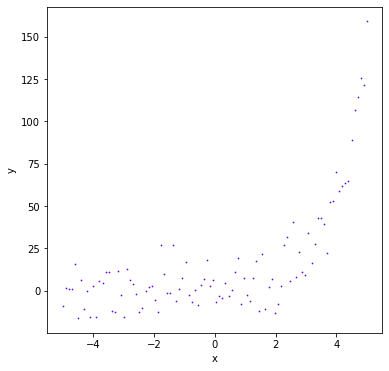

In [719]:
import matplotlib.pyplot as plt 
import numpy as np 
from math import e

#define the function 

def func(x,c1,c2,c3):
    return (c1 + c2*e**(c3*x))

# here N is the number of iterations, alpha is the noise parameter variable, and noise is the amount 
# that is added to the y function later on
N = 100
a = 100
noise = a * np.random.normal(0,0.1,size=N)
c1_actual,c2_actual,c3_actual = 1,1,1

x = np.linspace(-5,5,N)
y = func(x,c1_actual,c2_actual,c3_actual) + noise # define y as the function plus a small amount of noise

#plot our function 
plt.figure(figsize = (6,6))
plt.scatter(x,y,s=2,c="#6800e6", marker=".")
plt.xlabel("x")
plt.ylabel("y")
#plt.axis('equal')
plt.show

In [720]:
from numpy.linalg import norm, inv

# Compute the Jacobian

def computeDf(c,x):
    Df = np.zeros((len(x), 3))
    Df[:,0] = 1 #partial with respect to c1
    Df[:,1] = (e**(c[2]*x)) #partial with respect to c2
    Df[:,2] = (c[1]*x*e**(c[2]*x)) #partial with respect to c3
    return Df

def F(c):
    return norm(y-func(x,*c.T))**2

#Define the Gauss Newton Function
def GaussNewton(c_init, x, y):
    maxIteration  = 1000
    tol = 1e-2
    Df = computeDf(c_init,x)
    f = func(x,*c_init.T) #*c0.T takes elements of vector and write it out with transpose
    
    i = 1
    c = c_init
    
    res = (y-f)
    res_norms = [norm(res)]
    
    #iteration while checking for conditions of gauss newton
    while( norm(np.matmul(Df.T, res)) > tol  and i < maxIteration): 
        alpha = 1
        dc = np.matmul( inv(np.matmul(Df.T, Df)), np.matmul(Df.T, np.subtract(y,f)))

        # F(c) = ||y - f(c)||^2, where f(c) = "func"
        #         while F(c + alpha*dc) >= F(c):
        #             alpha *= 0.9
        
        #Update the rest of the variables and implement a line search algorithm
        while (F(c + alpha*dc) >= F(c)):
            alpha *= 0.9
            
        c_new = c + alpha*dc
        
        Df = computeDf(c_new,x)
 
        f = func(x,*c_new.T)
      
        # F(c) = norm(y - f)**2
        # find alpha > 0 : F()
        
        res = (y - f)
        i += 1
        c = c_new
        res_norms += [ norm(res) ]
        
    return c_new, i, res, res_norms

#randomly generate three values for c1, c2, and c3
c0 = np.random.rand()
c1 = np.random.rand()
c2 = np.random.rand()
c_initial = np.array([c0,c1,c2])
print(c_initial)

c, i, res, res_norms = GaussNewton(c_initial, x, y)

print("Parameters found using Gauss-Newton:", c)
print("Number of iterations done", i)


[0.1383215  0.33504023 0.84907751]
Parameters found using Gauss-Newton: [0.30326999 1.06284434 0.98753133]
Number of iterations done 6


<function matplotlib.pyplot.show(close=None, block=None)>

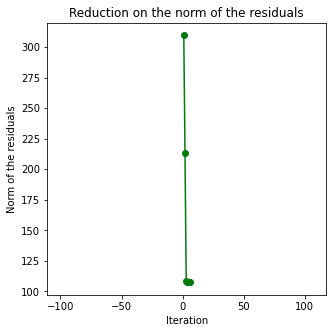

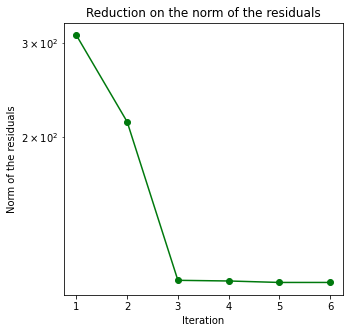

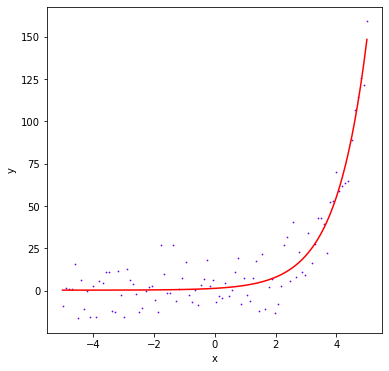

In [721]:
plt.figure( figsize = (5,5) )
plt.plot( range(1, i+1), res_norms, marker = 'o', color = "#00790d")  # range(1, i+1) vector going from 1 to i
plt.title("Reduction on the norm of the residuals")
plt.xlabel("Iteration")
plt.ylabel("Norm of the residuals") 
plt.axis("Equal") 
plt.show


plt.figure( figsize = (5,5) )
plt.plot( range(1, i+1), res_norms, marker = 'o', color = "#00790d")  # range(1, i+1) vector going from 1 to i
plt.title("Reduction on the norm of the residuals")
plt.xlabel("Iteration")
plt.ylabel("Norm of the residuals") 

ax = plt.gca()
ax.set_yscale('log')
plt.show

plt.figure(figsize = (6,6))
plt.scatter(x,y,s=2,c="#6800e6", marker=".")
plt.plot(x,func(x,*c.T),color = 'red')
plt.xlabel("x")
plt.ylabel("y")
#plt.axis('equal')
plt.show

/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in power
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in multiply
  return (c1 + c2*e**(c3*x))


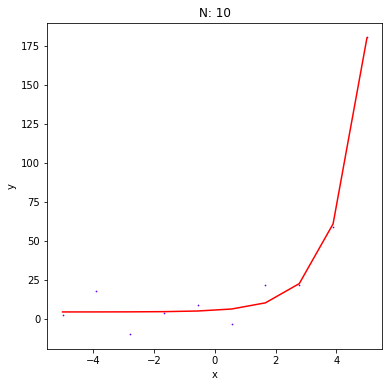

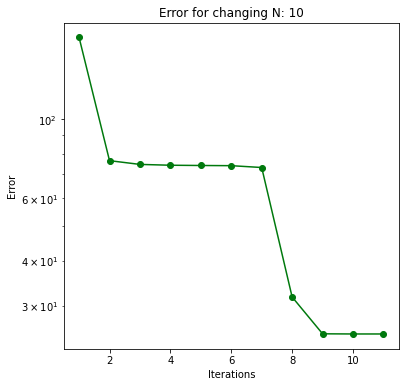

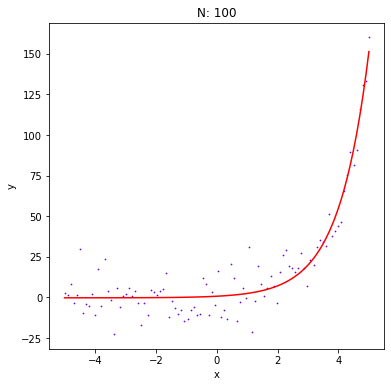

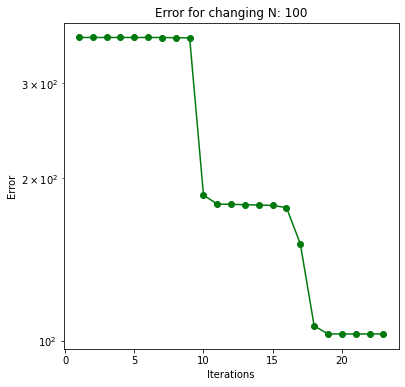

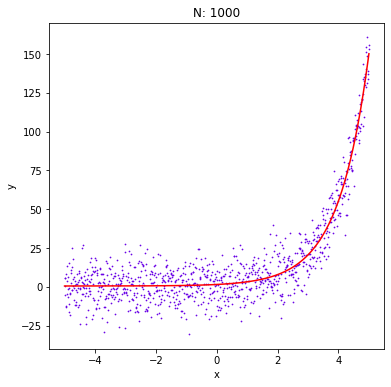

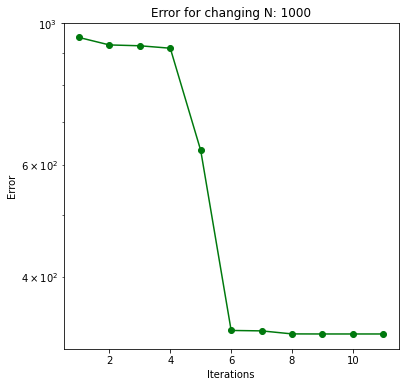

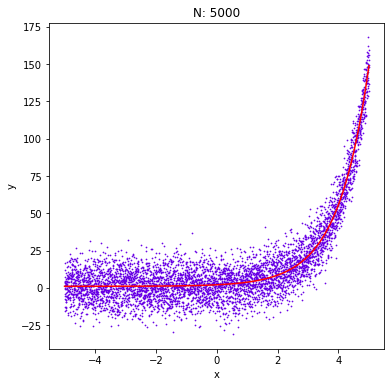

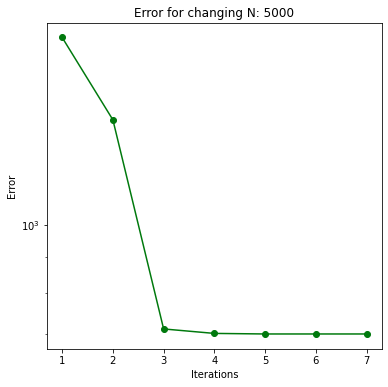

In [705]:
#Testing different parameters for N, alpha, and c

#Different N numbers
#N = 10, 100, 1000, 5000
N_list = [10,100,1000,5000]
a_list = [0,5,10,50,100]
c_list = [[1,1,1], [10, 1, 1], [1, -1, -1], [1, 1, -1]]
for aa in range(0,len(N_list)):
    
    N = N_list[aa]
    a = a_list[4]
    c_pos = 0

    noise = a * np.random.normal(0,0.1,size=N)
    c1_actual,c2_actual,c3_actual = c_list[c_pos][0],c_list[c_pos][1],c_list[c_pos][2]

    x = np.linspace(-5,5,N)
    y = func(x,c1_actual,c2_actual,c3_actual) + noise # define y as the function plus a small amount of noise

    #randomly generate three values for c1, c2, and c3
    c0 = np.random.rand()
    c1 = np.random.rand()
    c2 = np.random.rand()
    c_initial = np.array([c0,c1,c2])

    c, i, res, res_norms = GaussNewton(c_initial, x, y)

    plt.figure(figsize = (6,6))
    plt.title("N: " + str(N_list[aa]))
    plt.scatter(x,y,s=2,c="#6800e6", marker=".")
    plt.plot(x,func(x,*c.T),color = 'red')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axis('equal')
    plt.show
    
    plt.figure( figsize = (6,6) )
    plt.plot( range(1, i+1), res_norms, marker = 'o', color = "#00790d")  # range(1, i+1) vector going from 1 to i
    plt.title("Error for changing N: " + str(N_list[aa]))
    plt.xlabel("Iterations")
    plt.ylabel("Error") 

    ax = plt.gca()
    ax.set_yscale('log')
    plt.show


/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in power
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in multiply
  return (c1 + c2*e**(c3*x))


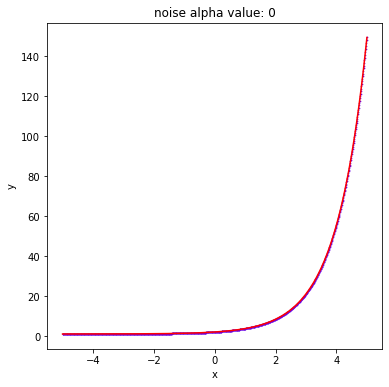

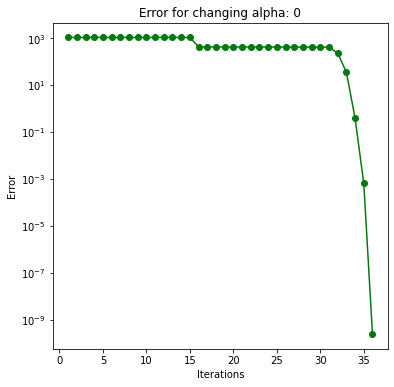

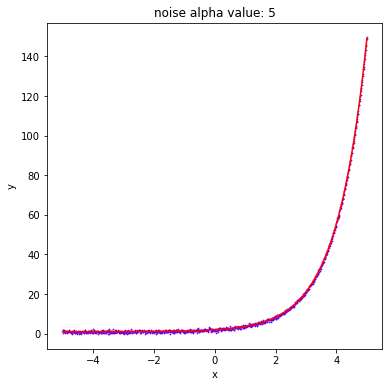

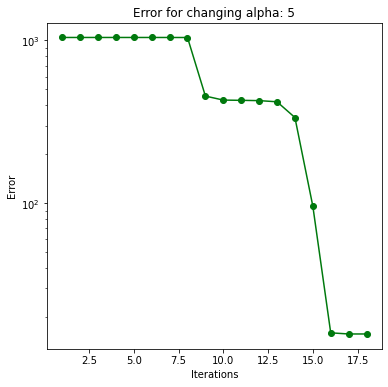

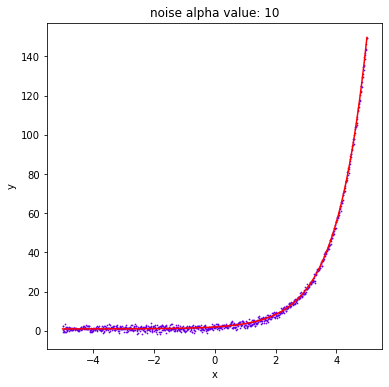

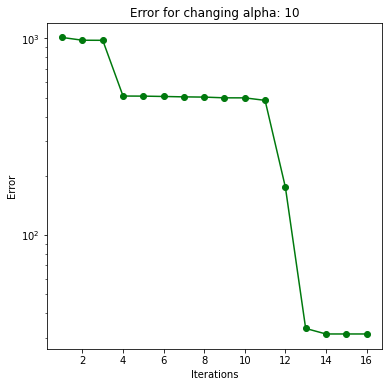

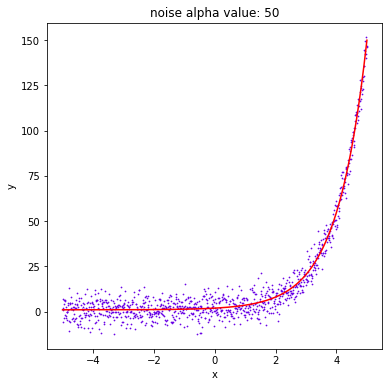

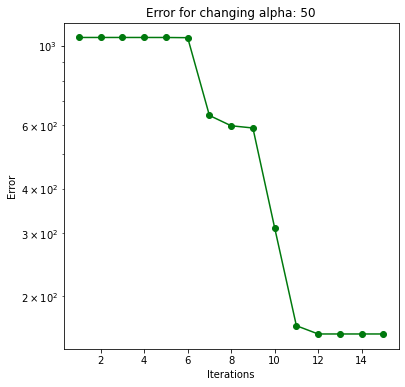

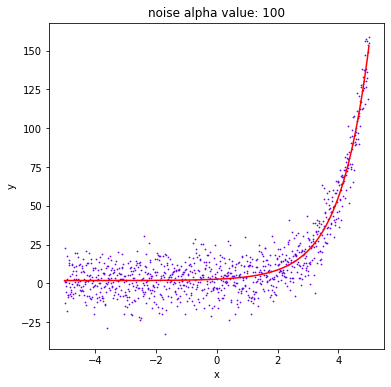

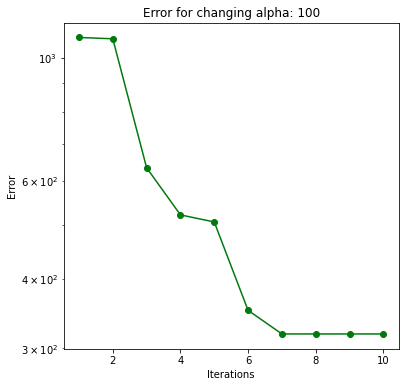

In [683]:
#Testing parameters: Noise intensities 
#Different a values: 
#a = 0, 5, 10, 50, 100
N_list = [10,100,1000,5000]
a_list = [0,5,10,50,100]
c_list = [[1,1,1], [10, 1, 1], [1, -1, -1], [1, 1, -1]]
for aa in range(0,len(a_list)):
    
    N = N_list[2]
    a = a_list[aa]
    c_pos = 0

    noise = a * np.random.normal(0,0.1,size=N)
    c1_actual,c2_actual,c3_actual = c_list[c_pos][0],c_list[c_pos][1],c_list[c_pos][2]

    x = np.linspace(-5,5,N)
    y = func(x,c1_actual,c2_actual,c3_actual) + noise # define y as the function plus a small amount of noise

    #randomly generate three values for c1, c2, and c3
    c0 = np.random.rand()
    c1 = np.random.rand()
    c2 = np.random.rand()
    c_initial = np.array([c0,c1,c2])

    c, i, res, res_norms = GaussNewton(c_initial, x, y)

    plt.figure(figsize = (6,6))
    plt.title("noise alpha value: " + str(a_list[aa]))
    plt.scatter(x,y,s=2,c="#6800e6", marker=".")
    plt.plot(x,func(x,*c.T),color = 'red')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axis('equal')
    plt.show
    
    plt.figure( figsize = (6,6) )
    plt.plot( range(1, i+1), res_norms, marker = 'o', color = "#00790d")  # range(1, i+1) vector going from 1 to i
    plt.title("Error for changing alpha: " + str(a_list[aa]))
    plt.xlabel("Iterations")
    plt.ylabel("Error") 

    ax = plt.gca()
    ax.set_yscale('log')
    plt.show


/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in power
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in multiply
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in power
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in multiply
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in power
  return (c1 + c2*e**(c3*x))
/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_33432/1270692392.py:8: RuntimeWarning: overflow encountered in multiply
  return (c1 + c2*e**(c3*x))


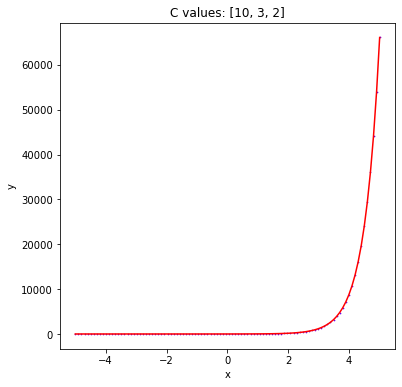

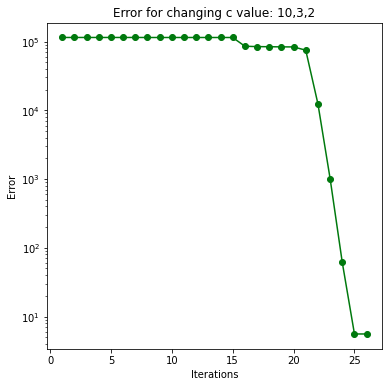

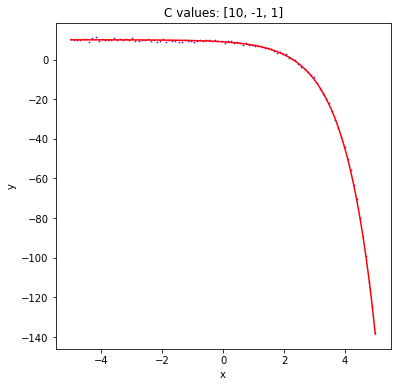

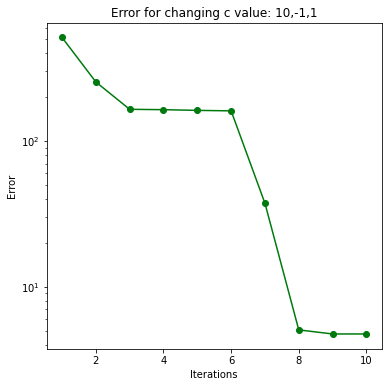

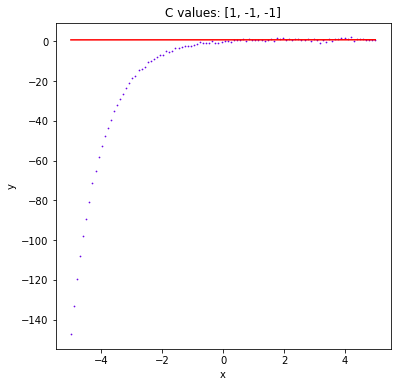

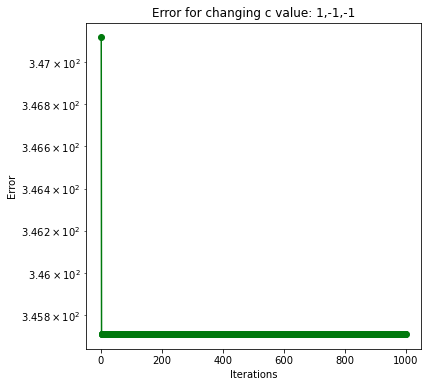

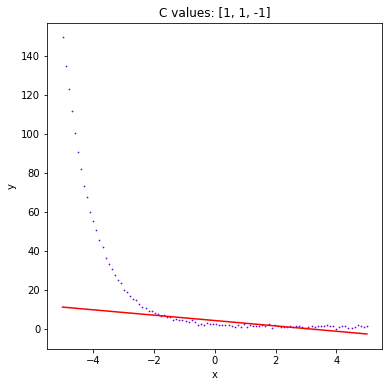

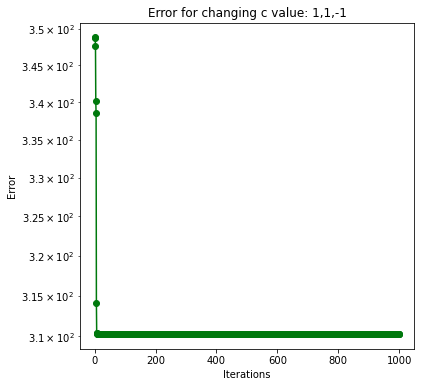

In [715]:
# Testing parameters: initial c values
# Different c values: 
# (c1, c2, c3) = (1,1,1), (10, 1, 1), (1, -1, -1), (1, 1, -1)

#Testing parameters: Noise intensities 
#Different a values: 
#a = 0, 5, 10, 50, 100
N_list = [10,100,1000,5000]
a_list = [0,5,10,50,100]
c_list = [[10,3,2], [10, -1, 1], [1, -1, -1], [1, 1, -1]]
for aa in range(0,len(c_list)):
    
    N = N_list[1]
    a = a_list[1]
    c_pos = aa

    noise = a * np.random.normal(0,0.1,size=N)
    c1_actual,c2_actual,c3_actual = c_list[c_pos][0],c_list[c_pos][1],c_list[c_pos][2]

    x = np.linspace(-5,5,N)
    y = func(x,c1_actual,c2_actual,c3_actual) + noise # define y as the function plus a small amount of noise

    #randomly generate three values for c1, c2, and c3
    c0 = np.random.rand()
    c1 = np.random.rand()
    c2 = np.random.rand()
    c_initial = np.array([c0,c1,c2])

    c, i, res, res_norms = GaussNewton(c_initial, x, y)

    plt.figure(figsize = (6,6))
    plt.title("C values: " + str(c_list[aa]))
    plt.scatter(x,y,s=2,c="#6800e6", marker=".")
    plt.plot(x,func(x,*c.T),color = 'red')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axis('equal')
    plt.show

    plt.figure( figsize = (6,6) )
    plt.plot( range(1, i+1), res_norms, marker = 'o', color = "#00790d")  # range(1, i+1) vector going from 1 to i
    plt.title("Error for changing c value: " + str(c_list[c_pos][0]) + "," + str(c_list[c_pos][1]) + "," + str(c_list[c_pos][2]))
    plt.xlabel("Iterations")
    plt.ylabel("Error") 

    ax = plt.gca()
    ax.set_yscale('log')
    plt.show
    